In [2]:
#라이브러리 로드
import numpy as np
import pandas as pd
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

from colorsys import rgb_to_hsv
from keras.preprocessing.image import load_img

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [3]:
from PIL import Image

## 0. 상숫값 및 경로 설정

In [4]:
image_dir = 'images/' #1.이미지 불러오기 - 이미지 폴더 디렉토리
seed = 211012
sample_ratio = 1 #1.이미지 불러오기 - 샘플링 비율
pca_threshold = 0.99 #3. PCA - 적합한 차원 수 찾기
save_dir = 'saves1/' #6. 데이터 저장 - 데이터 저장 디렉토리

## 1. 이미지 불러오기

In [1]:

def get_file_names(path, ends, sample_ratio = 1):
    file_names = []

    with os.scandir(path) as files:
        for file in files:
            # .jpg .png 등 확장자명이 'g'로 끝나는 파일들 모두 읽기
            if file.name.endswith(ends):
                file_names.append(image_dir + file.name)

    if sample_ratio < 1:
        file_names = random.sample(file_names, int(len(file_names) * sample_ratio))
        
    return file_names

NameError: name 'os' is not defined

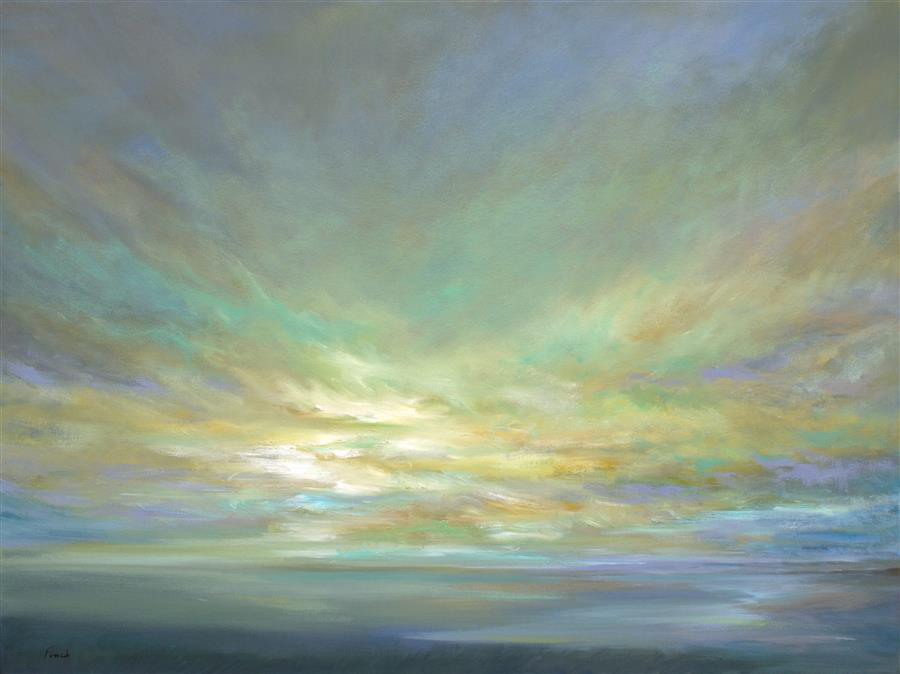

In [5]:
target_name = file_names[3]
img = load_img(target_name)
img

## 2. RGB-HSV 데이터 추출

In [6]:
def getLabel(color, colorGrid):
    newH = (int)((color[0] / 180) * colorGrid[0])
    newS = (int)((color[1] / 256) * colorGrid[1])
    newV = (int)((color[2] / 256) * colorGrid[2])
    return newH * colorGrid[1] * colorGrid[2] + newS * colorGrid[2] + newV

In [7]:
def extract_data_hsv(file_name, image_size = (224, 224), grid = 5 , cgrid = (12, 8, 8)):
    img = cv2.imread(file_names[3])
    img = cv2.resize(img, (224, 224))
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    grid_count = np.zeros([grid * 2, cgrid[0] * cgrid[1] * cgrid[2]])
    clr_data = []
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            label = getLabel(img_hsv[i][j], cgrid)

            grid_count[(int)((i / image_size[0]) * grid)][label] += 1
            grid_count[grid + (int)((i / image_size[0]) * grid)][label] += 1
    for i, grid in enumerate(grid_count):
        grid_total = grid_count[i].sum()
        clr_data.append(grid_count[i] / grid_total) 
    return clr_data

In [213]:
def getLabel(color, colorGrid):
    newH = (int)((color[0] / 180) * colorGrid[0])
    newS = (int)((color[1] / 256) * colorGrid[1])
    newV = (int)((color[2] / 256) * colorGrid[2])
    return newH * colorGrid[1] * colorGrid[2] + newS * colorGrid[2] + newV

In [41]:
def extract_data_hsv(file_name, image_size = (224, 224), grid = 5 , cgrid = (12, 8, 8)):
    img = cv2.imread(file_name)
    img = cv2.resize(img, (224, 224))
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    grid_count = np.zeros([grid * 2, cgrid[0] * cgrid[1] * cgrid[2]])
    clr_data = []
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            label = getLabel(img_hsv[i][j], cgrid)

            grid_count[(int)((i / image_size[0]) * grid)][label] += 1
            grid_count[grid + (int)((i / image_size[0]) * grid)][label] += 1
    for i, grid in enumerate(grid_count):
        grid_total = grid_count[i].sum()
        clr_data.append(grid_count[i] / grid_total)
    return np.array(clr_data).sum(axis = 0).reshape(1, -1)

In [42]:
grid_data = extract_data_hsv(target_name)
grid_table = pd.DataFrame(grid_data)

In [43]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
        
def save_data(data, file_name, save_dir):
    createFolder(save_dir)
    try:
        save_name = save_dir + file_name.rsplit('.')[0].rsplit('/')[-1] + ".csv"
        data.to_csv(save_name)
    except:
        print ('Error: Creating Data. ' + save_name)

In [44]:
save_data(grid_table, target_name, save_dir)

## 8. 전체 데이터셋 수행

In [46]:
for file_name in tqdm(file_names):
    save_name = save_dir + file_name.rsplit('.')[0].rsplit('/')[-1] + ".csv"
    if not os.path.isfile(save_name):
        try:
            grid_data = extract_data_hsv(file_name)
            grid_table = pd.DataFrame(grid_data)
            save_data(grid_table, file_name, save_dir)
        except:
            print("Error Detected at : " + file_name)

100%|██████████████████████████████████████████████████████████████████████████████| 5411/5411 [52:54<00:00,  1.70it/s]
